In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from stats import statistical_test

In [3]:
data_dir = './feature/'
users = [user for user in sorted(os.listdir(data_dir)) if user[0].isalpha()]

In [4]:
# count events of non-relapse and relapse in train and val
nr_tr = []
nr_val = []
r_val = []
for i in range(10):
    nr_tr.append(len(sorted(os.listdir(data_dir + users[i] + "/train/non-relapse"))[1:]))
    nr_val.append(len(sorted(os.listdir(data_dir + users[i] + "/val/non-relapse"))[1:]))
    r_val.append(len(sorted(os.listdir(data_dir + users[i] + "/val/relapse"))[1:]))

print("# days of non-replase: ", sum(nr_val)) #+ sum(nr_val)
print("# days of relapse: ", sum(r_val))

# days of non-replase:  192
# days of relapse:  257


In [5]:
# count time intervals of non-relapse and relapse in train and val
print(nr_val)
print(r_val)
print(nr_tr)

[27, 17, 19, 18, 19, 25, 23, 24, 4, 16]
[8, 49, 9, 15, 1, 20, 1, 87, 1, 66]
[227, 170, 163, 157, 162, 202, 186, 221, 68, 147]


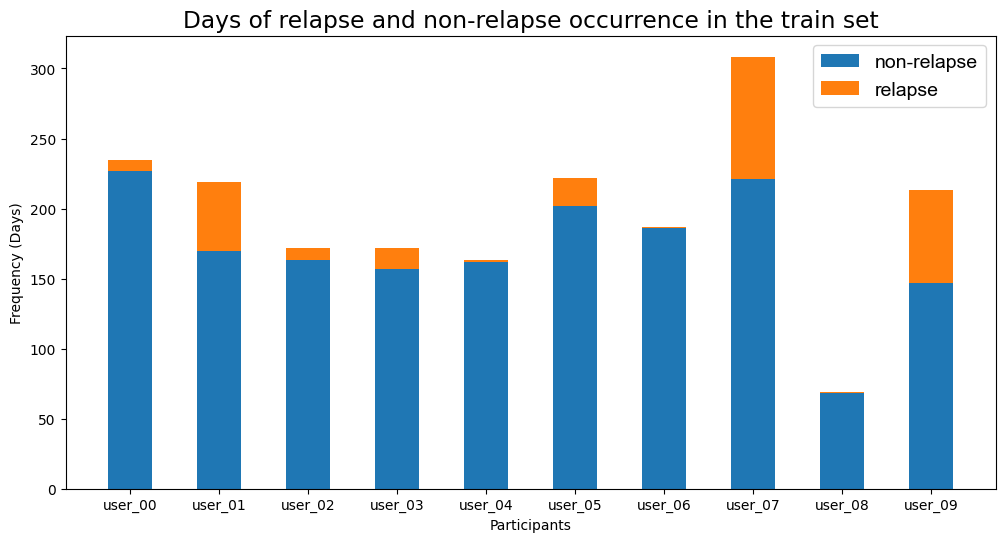

In [7]:
events = {
    "non-relapse": nr_tr,
    "relapse": r_val,
    }
width = 0.5


# Create the figure
# Desired figure size in pixels
width_px = 1000
height_px = 600

# DPI (dots per inch)
dpi = 100

# Calculate figure size in inches
fig_size_inches = (width_px / dpi, height_px / dpi)

fig, ax = plt.subplots(figsize=fig_size_inches, dpi=dpi)
fig.set_size_inches(12, 6)
bottom = np.zeros(10)
for boolean, event in events.items():
    p = ax.bar(users, event, width, label=boolean, bottom=bottom)
    bottom += event

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Arial'] 
plt.rcParams['font.size'] = 14
ax.set_title("Days of relapse and non-relapse occurrence in the train set")
ax.legend(loc="upper right")

plt.xlabel('Participants')
plt.ylabel('Frequency (Days)')
plt.show()


### Distribution and statistical test

In [2]:
raw_data_list = sorted(['../input/' + file for file in os.listdir('../input') if file[0:8] == 'input_v2'])
col = ['day_index','lin_acc_norm', 'ang_acc_norm', 'heartRate_mean',
       'heartRate_max', 'heartRate_min', 'rRInterval_mean', 'rRInterval_rmssd',
       'rRInterval_sdnn', 'rRInterval_sd1', 'rRInterval_sd2',
       'rRInterval_lombscargle_power_high', 'rRInterval_lombscargle_power_low',
       'sleeping','label']

var_list = ['day_index','lin_acc_norm', 'ang_acc_norm', 'heartRate_mean',
       'heartRate_max', 'heartRate_min', 'rRInterval_mean', 'rRInterval_rmssd',
       'rRInterval_sdnn', 'rRInterval_sd1', 'rRInterval_sd2',
       'rRInterval_lombscargle_power_high', 'rRInterval_lombscargle_power_low','outcome']

raw_data = []
sleep_data = []
awake_data = []

for i in range(1):
       raw_data = pd.read_csv(raw_data_list[i], index_col=0)[col]
       # raw_data.append(df)
# raw_data = pd.concat(raw_data, axis=0)
       raw_data['outcome'] = raw_data['label'].apply(lambda x: 0 if x == 'normal' else 1)

       sleep = raw_data[raw_data.sleeping == 1.0]
       awake = raw_data[raw_data.sleeping == 0.0]

       # df = raw_data[var_list].groupby(['outcome','day_index']).mean().reset_index()
       df_sleep = sleep[var_list].groupby(['outcome','day_index']).mean().reset_index()
       df_awake = awake[var_list].groupby(['outcome','day_index']).mean().reset_index()

       sleep_data.append(df_sleep)
       awake_data.append(df_awake)

sleep_final = pd.concat(sleep_data, axis=0)
awake_final = pd.concat(awake_data, axis=0)

In [5]:
var_list = ['lin_acc_norm', 'ang_acc_norm', 'heartRate_mean',
       'rRInterval_mean', 'rRInterval_rmssd',
       'rRInterval_sdnn', 'rRInterval_sd1', 'rRInterval_sd2',
       'rRInterval_lombscargle_power_high', 'rRInterval_lombscargle_power_low',]

# var_list = ['lin_acc_norm', 'heartRate_mean', 'rRInterval_mean', 'rRInterval_rmssd','rRInterval_sdnn']
ks_statistic, adjusted_pval, data_distribution = statistical_test(awake_final, var_list, [])
print("For all variables: \n")
print("ks_statisitc: \n", ks_statistic)
print("adjusted p-values: \n", adjusted_pval)
print("data distribution (mean1, std1, mean2, std2): \n", data_distribution)

For all variables: 

ks_statisitc: 
 [0.52, 0.36, 0.57, 0.39, 0.5, 0.6, 0.5, 0.61, 0.51, 0.64]
adjusted p-values: 
 [0.02       0.166      0.01       0.11777778 0.02       0.00666667
 0.02       0.005      0.02       0.005     ]
data distribution (mean1, std1, mean2, std2): 
 [[0.5, 0.17, 0.68, 0.13], [5.87, 2.52, 7.96, 2.74], [90.92, 14.15, 101.87, 9.52], [697.13, 59.78, 681.33, 15.97], [126.37, 38.4, 124.63, 15.6], [110.42, 34.31, 99.08, 10.42], [89.23, 27.26, 88.11, 11.04], [124.01, 41.03, 106.46, 10.94], [0.04, 0.06, 0.06, 0.03], [0.02, 0.02, 0.03, 0.01]]


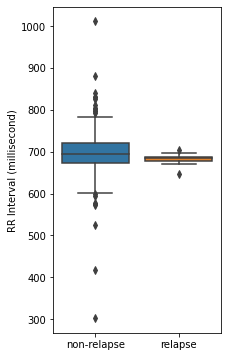

In [10]:
awake_final['label'] = awake_final['outcome'].apply(lambda x: "non-relapse" if x == 0 else "relapse")
sleep_final['label'] = sleep_final['outcome'].apply(lambda x: "non-relapse" if x == 0 else "relapse")
plt.figure(figsize=(3,6))
sns.boxplot(data=awake_final, y='rRInterval_mean', x='label')
plt.xlabel('')
plt.ylabel('RR Interval (millisecond)')
plt.show()
# plt.ylim([0.005,0.03])